In [ ]:
!gsutil -m cp gs://fc-e7760257-20a8-46ae-8358-93a83f02a0ba/nuclei_cell_hashing/pilot/featured_space/exp/exp_demux_10x.h5 /projects/demo/

In [1]:
import scCloud as sc
import numpy as np
import os

/opt/miniconda3/envs/scCloud-dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [2]:
n_jobs = os.cpu_count()
output_name = "/projects/demo/exp_out"
print("Use {} cores.".format(n_jobs))

Use 28 cores.


## Preprocessing

In [3]:
adata = sc.tools.read_input("/projects/demo/exp_demux_10x.h5", select_singlets = True)
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Read input is finished. Time spent = 0.48s.


AnnData object with n_obs × n_vars = 3267 × 27998 
    obs: 'Channel', 'assignment'
    var: 'gene_ids'
    uns: 'genome'

In [4]:
sc.tools.update_var_names(adata)

update_var_names is finished. Time spent = 0.04s.


In [5]:
sc.tools.filter_data(adata, mito_prefix = 'mt-', min_genes = 200)

After filteration, 3219 cells and 20353 genes are kept. Among 20353 genes, 18870 genes are robust.
filter_data is finished. Time spent = 0.32s.


In [6]:
sc.tools.log_norm(adata, norm_count = 1e5)

Normalization is finished. Time spent = 0.14s.


In [7]:
sc.tools.select_highly_variable_genes(adata, consider_batch = False, n_jobs = n_jobs)

batch_correction.select_highly_variable_genes done. Time spent = 0.27s.
2000 genes are selected.


In [8]:
adata_hvg = sc.tools.collect_highly_variable_gene_matrix(adata)
adata_hvg

AnnData object with n_obs × n_vars = 3219 × 2000 
    obs: 'Channel', 'assignment', 'n_genes', 'n_counts', 'percent_mito'
    var: 'gene_ids', 'n_cells', 'percent_cells', 'robust', 'highly_variable_genes', 'hvg_rank'
    uns: 'genome'

In [9]:
sc.tools.run_pca(adata_hvg)
adata.obsm['X_pca'] = adata_hvg.obsm['X_pca']

PCA is done. Time spent = 0.23s.


In [10]:
sc.tools.run_diffmap(adata, 'X_pca', n_jobs = n_jobs)

Nearest neighbor search is finished in 0.58s.
Constructing affinity matrix is done.
Calculating connected components is done.
Calculating normalized affinity matrix is done.
Calculating diffusion map is done.
run_diffmap finished. Time spent = 1.15s.


In [11]:
sc.tools.get_kNN(adata, 'X_diffmap', K = 100, n_jobs = n_jobs)

Nearest neighbor search is finished in 0.46s.


(array([[1968, 2591, 2914, ...,  987, 2299,  579],
        [ 935,  723, 1113, ..., 2645,  774, 2798],
        [1230, 2080,  724, ..., 2762, 2512, 1882],
        ...,
        [2189,  612, 1851, ..., 2569, 1526, 2972],
        [2065, 3081, 2072, ..., 1832,  412, 1634],
        [2196,  417, 2919, ...,   77, 3084, 1454]]),
 array([[0.03163684, 0.0334466 , 0.04304405, ..., 0.18941814, 0.1903473 ,
         0.19197454],
        [0.39689505, 0.43759236, 0.4523287 , ..., 0.8521146 , 0.8529366 ,
         0.8534991 ],
        [0.22492984, 0.23257615, 0.24331553, ..., 0.8928646 , 0.8948886 ,
         0.8969431 ],
        ...,
        [0.12076627, 0.18384951, 0.22323509, ..., 0.6754462 , 0.6801574 ,
         0.68493885],
        [0.19510473, 0.20112924, 0.24719004, ..., 0.89249   , 0.89848727,
         0.9022709 ],
        [0.35034153, 0.38919684, 0.3907435 , ..., 0.8377804 , 0.83929217,
         0.84018356]], dtype=float32))

In [12]:
adata.obsm['X_diffmap_pca'] = sc.tools.reduce_diffmap_to_3d(adata.obsm['X_diffmap'])

Reduce diffmap to 3D is done. Time spent = 0.01s.


## Clustering

In [13]:
sc.tools.run_leiden(adata, n_iter = 2)

Graph is constructed. Time spent = 0.19s.
Leiden clustering is done. Time spent = 0.53s.


## Dimension Reduction

In [14]:
sc.tools.run_fitsne(adata, rep_key = 'X_pca', n_jobs = n_jobs)

FItSNE is calculated. Time spent = 44.04s.


In [15]:
sc.tools.run_umap(adata, rep_key = 'X_pca')

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.5, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=0,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
UMAP is calculated. Time spent = 24.67s.


In [16]:
sc.tools.run_force_directed_layout(adata, file_name = output_name, n_jobs = n_jobs)

Constructing affinity matrix is done.
Graph is constructed. Time spent = 0.06s.
/projects/demo/exp_out.net is written.
['java', '-Djava.awt.headless=true', '-Xmx8g', '-cp', '/opt/software/scCloudPy/scCloud/ext/forceatlas2.jar:/opt/software/scCloudPy/scCloud/ext/gephi-toolkit-0.9.2-all.jar', 'kco.forceatlas2.Main', '--input', '/projects/demo/exp_out.net', '--output', '/projects/demo/exp_out.coords', '--nthreads', '28', '--seed', '0', '--targetChangePerNode', '2.0', '--targetSteps', '5000', '--2d']
Force-directed layout is generated.
Force-directed layout is calculated. Time spent = 4.31s.


## Save the Processed Data for Next Phases

In [17]:
sc.tools.write_output(adata, output_name)

Write main output is finished. Time spent = 1.58s.


## Differential Expression Analysis

In [18]:
sc.tools.run_de_analysis(output_name + '.h5ad', output_excel_file = output_name + '.de.xlsx', 
                         labels = 'leiden_labels', run_mwu = True, n_jobs = n_jobs)

Read input is finished. Time spent = 0.20s.
/projects/demo/exp_out.h5ad is loaded. Time spent = 0.46s.
Begin t_test.
Contingency table is collected.
Welch's t-test is done. Time spent = 4.16s.
Begin Mann-Whitney U test.
Mann-Whitney U test is done. Time spent = 20.47s.
Differential expression results are written back to h5ad file.
Excel spreadsheet is written.


## Find Markers

In [19]:
sc.tools.run_find_markers(output_name + '.h5ad', output_file = output_name + '.markers.xlsx',
                         label_attr = 'leiden_labels', n_jobs = n_jobs)

Read input is finished. Time spent = 0.66s.
[1]	valid_0's multi_error: 0.0938902	valid_1's multi_error: 0.236025
Training until validation scores don't improve for 1 rounds.
[2]	valid_0's multi_error: 0.0552295	valid_1's multi_error: 0.18323
[3]	valid_0's multi_error: 0.0434933	valid_1's multi_error: 0.15528
[4]	valid_0's multi_error: 0.0303763	valid_1's multi_error: 0.136646
[5]	valid_0's multi_error: 0.0276148	valid_1's multi_error: 0.124224
[6]	valid_0's multi_error: 0.0210563	valid_1's multi_error: 0.130435
Early stopping, best iteration is:
[5]	valid_0's multi_error: 0.0276148	valid_1's multi_error: 0.124224
LightGBM used 9.39s to train.
find_markers took 16.59s to finish.


## Annotating Clusters

In [20]:
import scCloud.annotate_cluster
scCloud.annotate_cluster.run_annotate_cluster(output_name + '.h5ad', output_file = output_name + '.anno.txt',
                                        json_file = 'mouse_brain')

Read input is finished. Time spent = 0.39s.
Time spent for annotating clusters is 0.52s.


## Plotting Results

In [21]:
adata = sc.tools.read_input(output_name + '.h5ad', mode = 'a')
adata

Read input is finished. Time spent = 0.65s.


AnnData object with n_obs × n_vars = 3219 × 20353 
    obs: 'Channel', 'assignment', 'n_genes', 'n_counts', 'percent_mito', 'leiden_labels'
    var: 'gene_ids', 'n_cells', 'percent_cells', 'robust', 'highly_variable_genes', 'hvg_rank', 'percentage_1', 'percentage_other_1', 'mean_log_expression_1', 'percentage_fold_change_1', 'log_fold_change_1', 'WAD_score_1', 't_pval_1', 't_qval_1', 'percentage_2', 'percentage_other_2', 'mean_log_expression_2', 'percentage_fold_change_2', 'log_fold_change_2', 'WAD_score_2', 't_pval_2', 't_qval_2', 'percentage_3', 'percentage_other_3', 'mean_log_expression_3', 'percentage_fold_change_3', 'log_fold_change_3', 'WAD_score_3', 't_pval_3', 't_qval_3', 'percentage_4', 'percentage_other_4', 'mean_log_expression_4', 'percentage_fold_change_4', 'log_fold_change_4', 'WAD_score_4', 't_pval_4', 't_qval_4', 'percentage_5', 'percentage_other_5', 'mean_log_expression_5', 'percentage_fold_change_5', 'log_fold_change_5', 'WAD_score_5', 't_pval_5', 't_qval_5', 'percenta

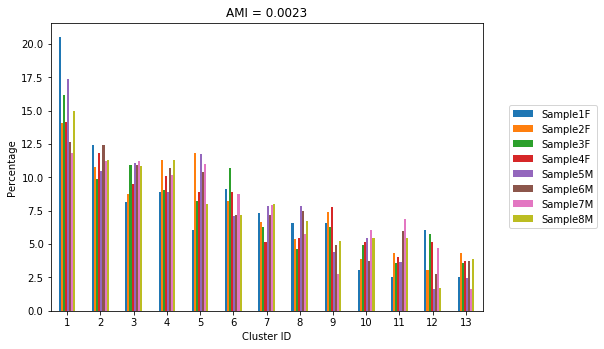

In [22]:
_ = sc.plotting.plot_composition(adata, cluster = 'leiden_labels', attr = 'assignment', 
                             style = 'normalized', stacked = False)

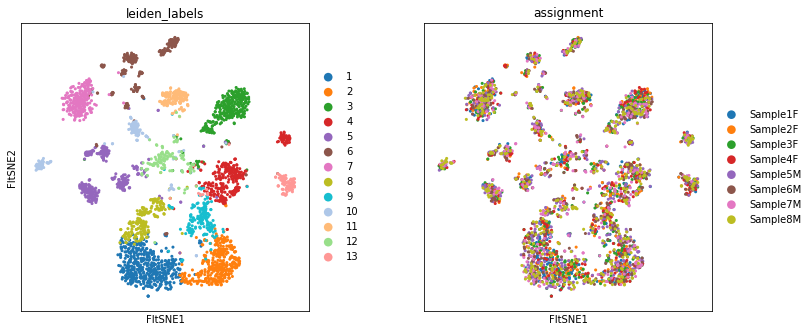

In [23]:
_ = sc.plotting.plot_scatter(adata, basis = 'fitsne', attrs = ['leiden_labels', 'assignment'])

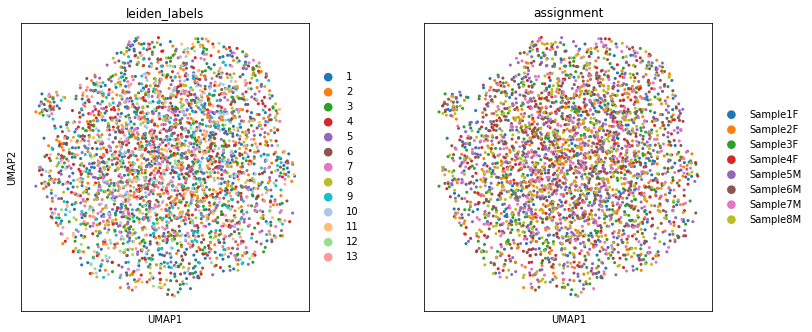

In [24]:
_ = sc.plotting.plot_scatter(adata, basis = 'umap', attrs = ['leiden_labels', 'assignment'])

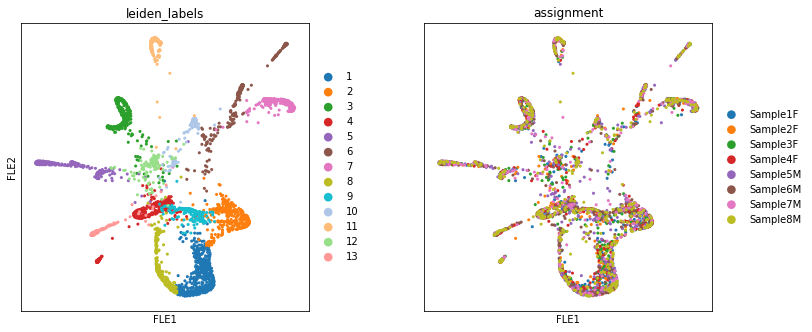

In [25]:
_ = sc.plotting.plot_scatter(adata, basis = 'fle', attrs = ['leiden_labels', 'assignment'])